In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

with open('wine.data') as file:
    lines = file.readlines()
    vals = [ list(map( float, line.rstrip().split(','))) for line in lines ];
    vals = np.array(vals )

    dataSet = np.delete(vals, 0, 1) # on supprime la colonne des types

title = [ 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity','Hue', 'OD280/OD315 of diluted wines',
    'Proline']

FileNotFoundError: [Errno 2] No such file or directory: 'wine.data'

## Calcule du PCA
Représentation en fonction des deux composantes principales

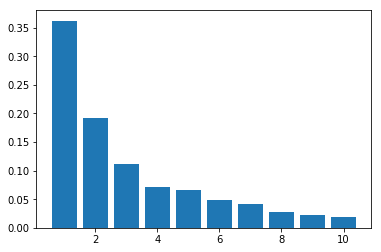

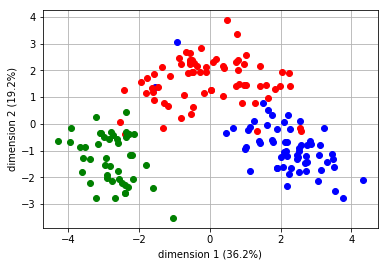

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
centerDataSet = scaler.fit_transform(dataSet)

pca = PCA(n_components=0.95)
pca.fit(centerDataSet)
plt.bar(range(1,pca.explained_variance_ratio_.shape[0]+1),pca.explained_variance_ratio_)
plt.show()


projection = pca.transform(centerDataSet)

plt.plot( projection[0:61,0], projection[0:61,1], 'bo' )
plt.plot( projection[62:132,0], projection[62:132,1], 'ro' )
plt.plot( projection[133:180,0], projection[133:180,1], 'go' )
plt.xlabel("dimension 1 ({0:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("dimension 2 ({0:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.grid()
plt.show()

## Recherche de l'influance des variables
Corrélation entre les variables et les vecteurs principaux  
Exemple du "Flavanoids"

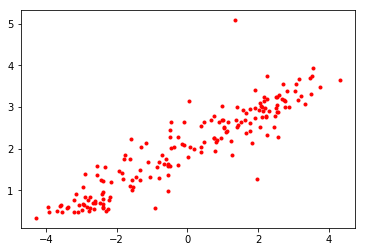

[[ 1.          0.91747018]
 [ 0.91747018  1.        ]]


In [56]:
plt.plot( projection[:,0], dataSet[:,6], 'r.')
plt.show()

from sklearn.metrics import matthews_corrcoef
corr = np.corrcoef(projection[:,0], dataSet[:,6])
print(corr)

## Cercle de corrélation
Affiche du cercle en fonction des deux principales composantes, interprétation de l'influance des composants du vin

In [57]:
def circleOfCorrelations(corr, variance_ratio, variable_text):
    plt.Circle((0,0),radius=10, color='g', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
    #fig = plt.gcf()
    fig = plt.figure(figsize=(15,15))
    fig.gca().add_artist(circle1)
    for idx in range(len(corr[0])):
        x = corr[0][idx] 
        y = corr[1][idx]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        plt.annotate(variable_text[idx], xy=(x,y), fontsize=15)
    plt.xlabel("dimension 1 ({0:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
    plt.ylabel("dimension 2 ({0:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
    plt.plot([-1,1], [0,0], 'r')
    plt.plot([0,0], [-1,1], 'r')
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Circle of Correlations")
    plt.show()

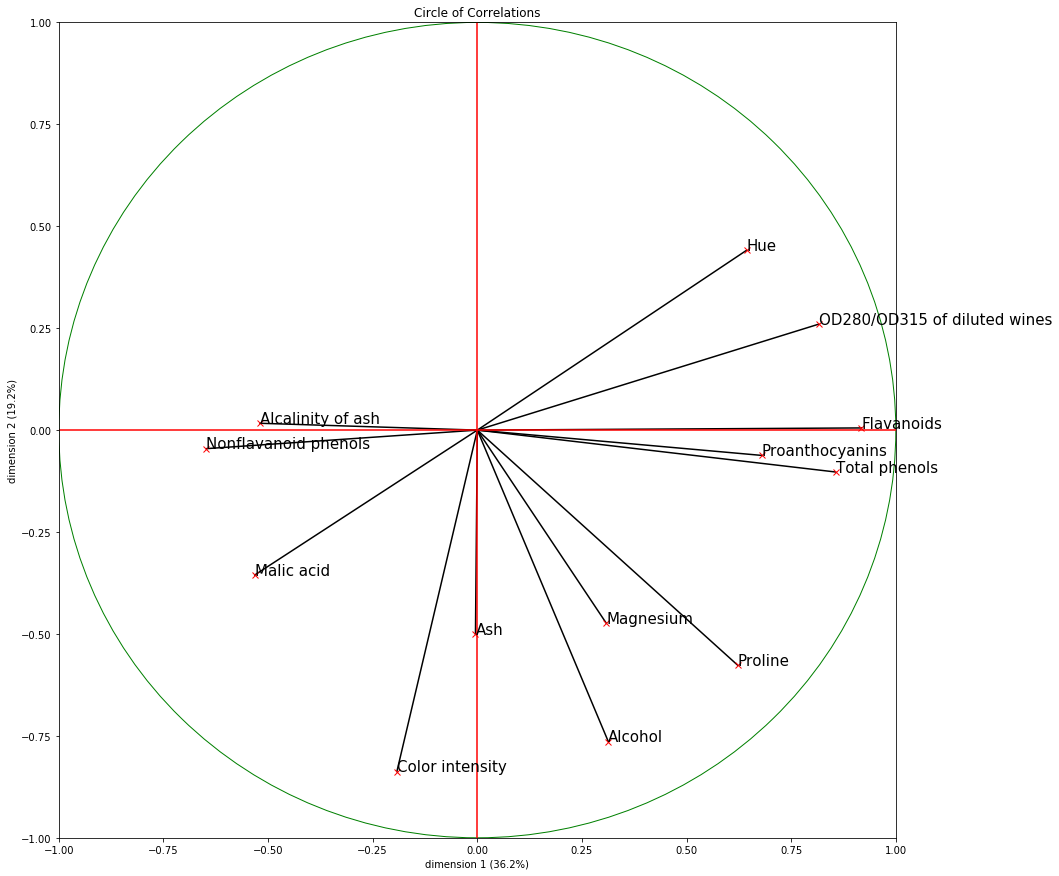

In [51]:

    
pc_0 = np.array([])
pc_1 = np.array([])
for i in range(len(dataSet[0])):
    pc_0 = np.append( pc_0, np.corrcoef(projection[:,0], dataSet[:,i])[0,1] )
    pc_1 = np.append( pc_1, np.corrcoef(projection[:,1], dataSet[:,i])[0,1])
pc_corr = np.array([ pc_0, pc_1 ])

circleOfCorrelations( pc_corr, pca.explained_variance_ratio_, title )

## Matrice de covariante
Permet de voir les corrélations entre les variables

In [59]:
np.savetxt( "covariante.txt", pca.get_covariance())